In this code example, we'll create splines in 2D and 3D.

In [1]:
%pylab inline
from pylab import *

import mpl_toolkits.mplot3d

import path_utils
path_utils.add_relative_to_current_source_file_path_to_sys_path("../../lib")

import flashlight.spline_utils as spline_utils

Populating the interactive namespace from numpy and matplotlib
Initializing flashlight v0.0.1


As in the previous example, we specify our spline in terms of keyframe values (the `p` values) at particular parameter values (the `t` values). We need to specify an array of `t` values for each dimension, because we solve for our spline coefficients separately for each dimension. So our `T` array is now a 2D array. Our `P` array is also now 2D array, where each row is a 2D point, and each column is a dimension. This convention seems to be the most common in Python libraries we use (e.g., scikit-learn) so we adopt it throughout flashlight. We also adopt the convention in flashlight that `x` is the right-most coordinate. So we make `y` the 0th column, and `x` the 1st column.

In [2]:
T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_y, T_x]
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_y, P_x]

print "T = "; print T; print; print "P = "; print P

T = 
[[0 0]
 [1 1]
 [2 2]
 [3 3]]

P = 
[[0 0]
 [4 9]
 [7 1]
 [9 4]]


We compute our spline coefficients, and evalute the resulting spline, exactly as in the previous example.

In [3]:
C, T, sd = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd, num_samples=100)

t = T_eval[:,0]

At this point, we are ready to plot the spline. We use color to represent the `t` value of each point on the spline, and we plot the keyframes with larger dots. For 2D plots, matplotlib adopts the convention of passing in the `x` coordinate in first, followed by the `y` coordinate. So we pass in `P_eval[:,1]` first because this is the `x` coordinate according to the flashlight convention. Then we pass in `P_eval[:,0]` because this is the `y` coordinate according to the flashlight convention.

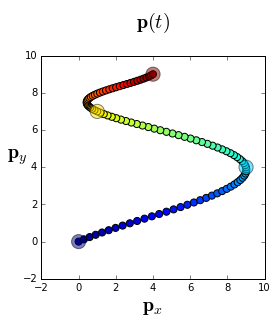

In [4]:
figsize(4,4);
scatter(P_eval[:,1], P_eval[:,0], c=t, s=50);
scatter(P[:,1], P[:,0], c=T[:,0], s=200, alpha=0.5);
gca().set_aspect("equal")
title("$\\mathbf{p}(t)$\n", fontsize=20);
ylabel("$\\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\\mathbf{p}_x$", fontsize=20);

Just as we did in 2D, we can compute splines in 3D.

In [5]:
T_z = matrix([0,1,2,3]).T.A
T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_z, T_y, T_x] 
P_z = matrix([0,0,1,2]).T.A
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_z, P_y, P_x]

C, T, sd = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd,num_samples=100)

For 3D plots, matplotlib adopts the convention of passing in the `x` coordinate in first, followed by the `y` coordinate, followed by the `z` coordinate, and assumes that `z` is up. In flashlight, we adopt the convention that `y` is up. In contrast to the matplotlib convention, the flashlight convention has the advantage that 2D examples (where `y` is obviously up) can be more easily extended to 3D without permuting the coordinates. Because of this difference in conventions, we pass in `P_eval[:,1]` as the last coordinate to matplotlib.

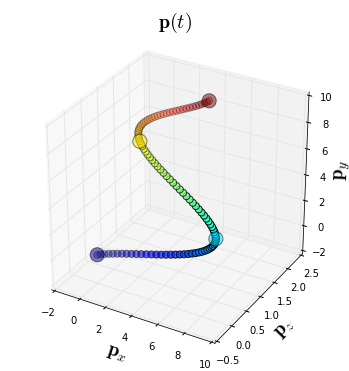

In [6]:
figsize(6,6);
fig = plt.figure(); ax = fig.add_subplot(111, projection="3d");
ax.scatter(P_eval[:,2], P_eval[:,0], P_eval[:,1], c=t, s=50);
ax.scatter(P[:,2], P[:,0], P[:,1], c=T[:,0], s=200, alpha=0.5);
title("$\\mathbf{p}(t)$\n", fontsize=20);
ax.set_zlabel("$\\mathbf{p}_y$", fontsize=20);
xlabel("$\\mathbf{p}_x$", fontsize=20); ylabel("$\\mathbf{p}_z$", fontsize=20);